In [2]:
import pandas as pd

# URL de la base de datos en Google Sheets
url = "https://docs.google.com/spreadsheets/d/1DY9UvAq2tTMpHxkehr0nWdPmrxmoMvP24i-DgGXXCQg/edit?usp=sharing"

# Convertir la URL para que sea legible por pandas
url_processed = url.replace('/edit?usp=sharing', '/export?format=xlsx')

# Leer solo las primeras 1000 filas para evitar cargar todos los datos
df = pd.read_excel(url_processed, nrows=1000)

# Mostrar las primeras filas del DataFrame
print(df.head())

   raefcorkpg  errreckg  raefcorkpr  errreckr   mabscorg  ermabscorg  \
0    1.798885  0.032630    1.714367  0.030933 -18.997331    0.007490   
1    4.130236  0.073744    3.740029  0.089617 -20.544652    0.008093   
2    4.363428  0.052895    3.552794  0.040211 -19.879273    0.005935   
3    7.835404  0.097313    7.297096  0.099193 -20.740652    0.006390   
4    3.372625  0.063600    3.121751  0.049791 -20.473762    0.008611   

    mabscorr  ermabscorr    muecorg  ermuecorg    muecorr  ermuecorr  \
0 -19.209551    0.007995  20.963168   0.130859  20.632535   0.147281   
1 -20.751417    0.008017  21.362550   0.123236  20.941692   0.119488   
2 -20.397308    0.005148  22.055854   0.076009  21.106686   0.047773   
3 -21.286233    0.005179  22.481206   0.102959  21.796334   0.108960   
4 -20.892306    0.007465  20.963321   0.152192  20.455456   0.155117   

   veldispcorg  veldispcorgerr  veldispcorr  veldispcorrerr  
0          NaN             NaN          NaN             NaN  
1    83.04

In [3]:
import numpy as np

# Aplicar logaritmo base 10 a la columna 'raefcorkpg'
df['log_raefcorkpg'] = np.log10(df['raefcorkpg'])

# Mostrar las primeras filas para verificar
print(df[['raefcorkpg', 'log_raefcorkpg']].head())

   raefcorkpg  log_raefcorkpg
0    1.798885        0.255003
1    4.130236        0.615975
2    4.363428        0.639828
3    7.835404        0.894061
4    3.372625        0.527968


In [5]:
# Calcular medidas de tendencia central para 'log_raefcorkpg' y 'muecorg'
mean_log_raefcorkpg = df['log_raefcorkpg'].mean()
median_log_raefcorkpg = df['log_raefcorkpg'].median()
mode_log_raefcorkpg = df['log_raefcorkpg'].mode()[0]
variance_log_raefcorkpg = df['log_raefcorkpg'].var()
std_log_raefcorkpg = df['log_raefcorkpg'].std()

mean_muecorg = df['muecorg'].mean()
median_muecorg = df['muecorg'].median()
mode_muecorg = df['muecorg'].mode()[0]
variance_muecorg = df['muecorg'].var()
std_muecorg = df['muecorg'].std()

# Mostrar los resultados
print(f"Media de log_raefcorkpg: {mean_log_raefcorkpg}")
print(f"Mediana de log_raefcorkpg: {median_log_raefcorkpg}")
print(f"Moda de log_raefcorkpg: {mode_log_raefcorkpg}")
print(f"Varianza de log_raefcorkpg: {variance_log_raefcorkpg}")
print(f"Desviación estándar de log_raefcorkpg: {std_log_raefcorkpg}")

print(f"Media de muecorg: {mean_muecorg}")
print(f"Mediana de muecorg: {median_muecorg}")
print(f"Moda de muecorg: {mode_muecorg}")
print(f"Varianza de muecorg: {variance_muecorg}")
print(f"Desviación estándar de muecorg: {std_muecorg}")

Media de log_raefcorkpg: 0.658803724465076
Mediana de log_raefcorkpg: 0.6867007176612947
Moda de log_raefcorkpg: -0.44057479616046474
Varianza de log_raefcorkpg: 0.06012127462634455
Desviación estándar de log_raefcorkpg: 0.2451964001088608
Media de muecorg: 21.433357313949724
Mediana de muecorg: 21.46600632537823
Moda de muecorg: 18.24615559025219
Varianza de muecorg: 0.7880646834230856
Desviación estándar de muecorg: 0.8877300735150778


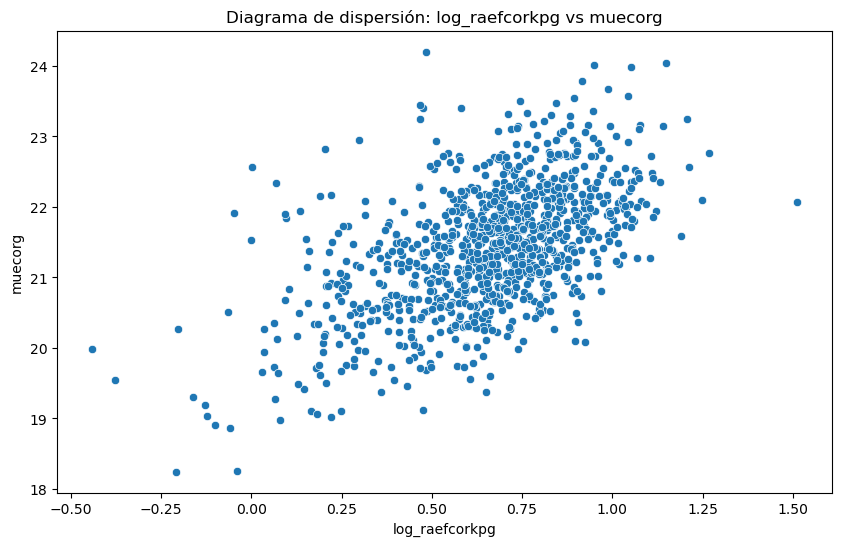

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar el diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_raefcorkpg', y='muecorg', data=df)
plt.title('Diagrama de dispersión: log_raefcorkpg vs muecorg')
plt.xlabel('log_raefcorkpg')
plt.ylabel('muecorg')
plt.show()

Ecuación de la regresión lineal: y = 1.9848 * x + 20.1258


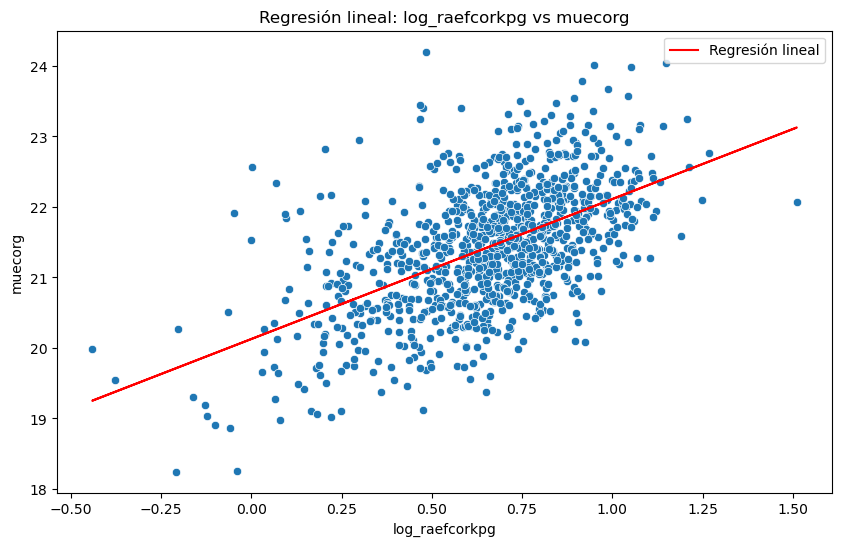

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar los datos para la regresión lineal
X = df[['log_raefcorkpg']]
y = df['muecorg']

# Aplicar regresión lineal
model = LinearRegression()
model.fit(X, y)

# Obtener la pendiente y la intersección
slope = model.coef_[0]
intercept = model.intercept_

print(f"Ecuación de la regresión lineal: y = {slope:.4f} * x + {intercept:.4f}")

# Graficar la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_raefcorkpg', y='muecorg', data=df)
plt.plot(X, model.predict(X), color='red', label='Regresión lineal')
plt.title('Regresión lineal: log_raefcorkpg vs muecorg')
plt.xlabel('log_raefcorkpg')
plt.ylabel('muecorg')
plt.legend()
plt.show()